# 4 - Influential Classification Models (and Tools)

## Introduction

This project will dive into more advanced developments of Convolutional Neural Networks (CNNs) that has become famous for their contributions to computer visions. The notebook will also explore methods that better prepare the CNNs to perform on specific tasks, such as the use of Transfer Learning whereby previous knowledge (trained weights) of a network on a specific use case can be transferred/re-develope for new applications. 

## Breakdown of this Notebook:
- Advance architectures of CNN like, VGG, Inception and ResNet.
- Implementations of these advance network for classification tasks.
- Transfer Learning for efficient repurposing of trained networks.

## Requirements:
- Tensorflow 2.0 (GPU is better)
- Tensorflow-Hub

### Import the required libraries:

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import timeit

In [2]:
import os
from IPython.display import display, Image
import matplotlib.pyplot as plt

# %matplotlib inline

# Set up the working directory for the images:
image_folderName = 'Description Images'
image_path = os.path.abspath(image_folderName) + '/'

In [3]:
# Set the random set seed number: for reproducibility.
Seed_nb = 42

### GPU Information:

In [4]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
devices = sess.list_devices()
devices

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:09:00.0, compute capability: 7.5



[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 14899965821281408340),
 _DeviceAttributes(/job:localhost/replica:0/task:0/device:GPU:0, GPU, 6588305899, 13612752824688014145)]

## 1 - Advanced CNN Architectures:

Advancements in recent years have pushed the capabilities of CNNs, winning models have been featured in contest such as the __ImageNet Large Scale Visual Recognition Challenge (ILSVRC)__. This contest consists of millions of images that are split up into __1,000__ classes and still represent a great challenge for researchers. In 2012, AlexNet had won the competeition. This section will then go through methods or architectures, and the model's contributions that were developed after the winning AlexNet. 

## 1.1 - Contributions from AlexNet:

AlexNet was known to be the first CNN that had successfully trained on the complex ILSVRC dataset for image recognition. The implementations of AlexNet lead to several contributions that are highly useful for CNNs. These contributions includes:

- Use of Rectified Linear Unit (ReLU) as an activation function. This had solved the vanishing gradient problem therefore improving the training process.
- The use of Dropout for CNNs. Essentially, it amounts to sampling a thinned-out network and is used as a regularisation technique.
- Application of different types of transformations to augment the dataset. These techniques can be image translation, horizontal fliipping, or cropping etc.
- Solidifying the typical archittecture of a CNN, such as combining convolutions with pooling layers and with the use of dense layers in latter stages for the final prediction.

The following will continue discussing the more advanced networks.

### List of Advanced Networks:
1) VGG, Visual Geometry Group. \
2) Inception. \
3) ResNet.

## 1.2 - VGG Architecture:

The VGG network was developed by the Visual Geometry Group at Oxford University. Thiis network was able to achieve 2nd place during the ILSVRC of 2014. This section will go through the architecture of VGG and how it was able to obtain a higher accuracy score while training on fewer parameters. The main motivatiion for VGG was to try and __go deeper__ as a network where it consists of building such a network with a larger number of stacked layers. The drawback from doing it this way is that the number of parameters also increased. This meant that it will take longer to train the model. When VGG was submitted into ILSVRC of 2014, they achieved the top-5 error of 7.3%, performing better than AlexNet which got a 16.4% error. 

NOTE: __Top-5 Accuracy__ is one of the main classification metrics of the contest, where it considers if the correct class prediction is amongst the five first guesses. 

#### The diagram below shows the overall architecures of VGG:

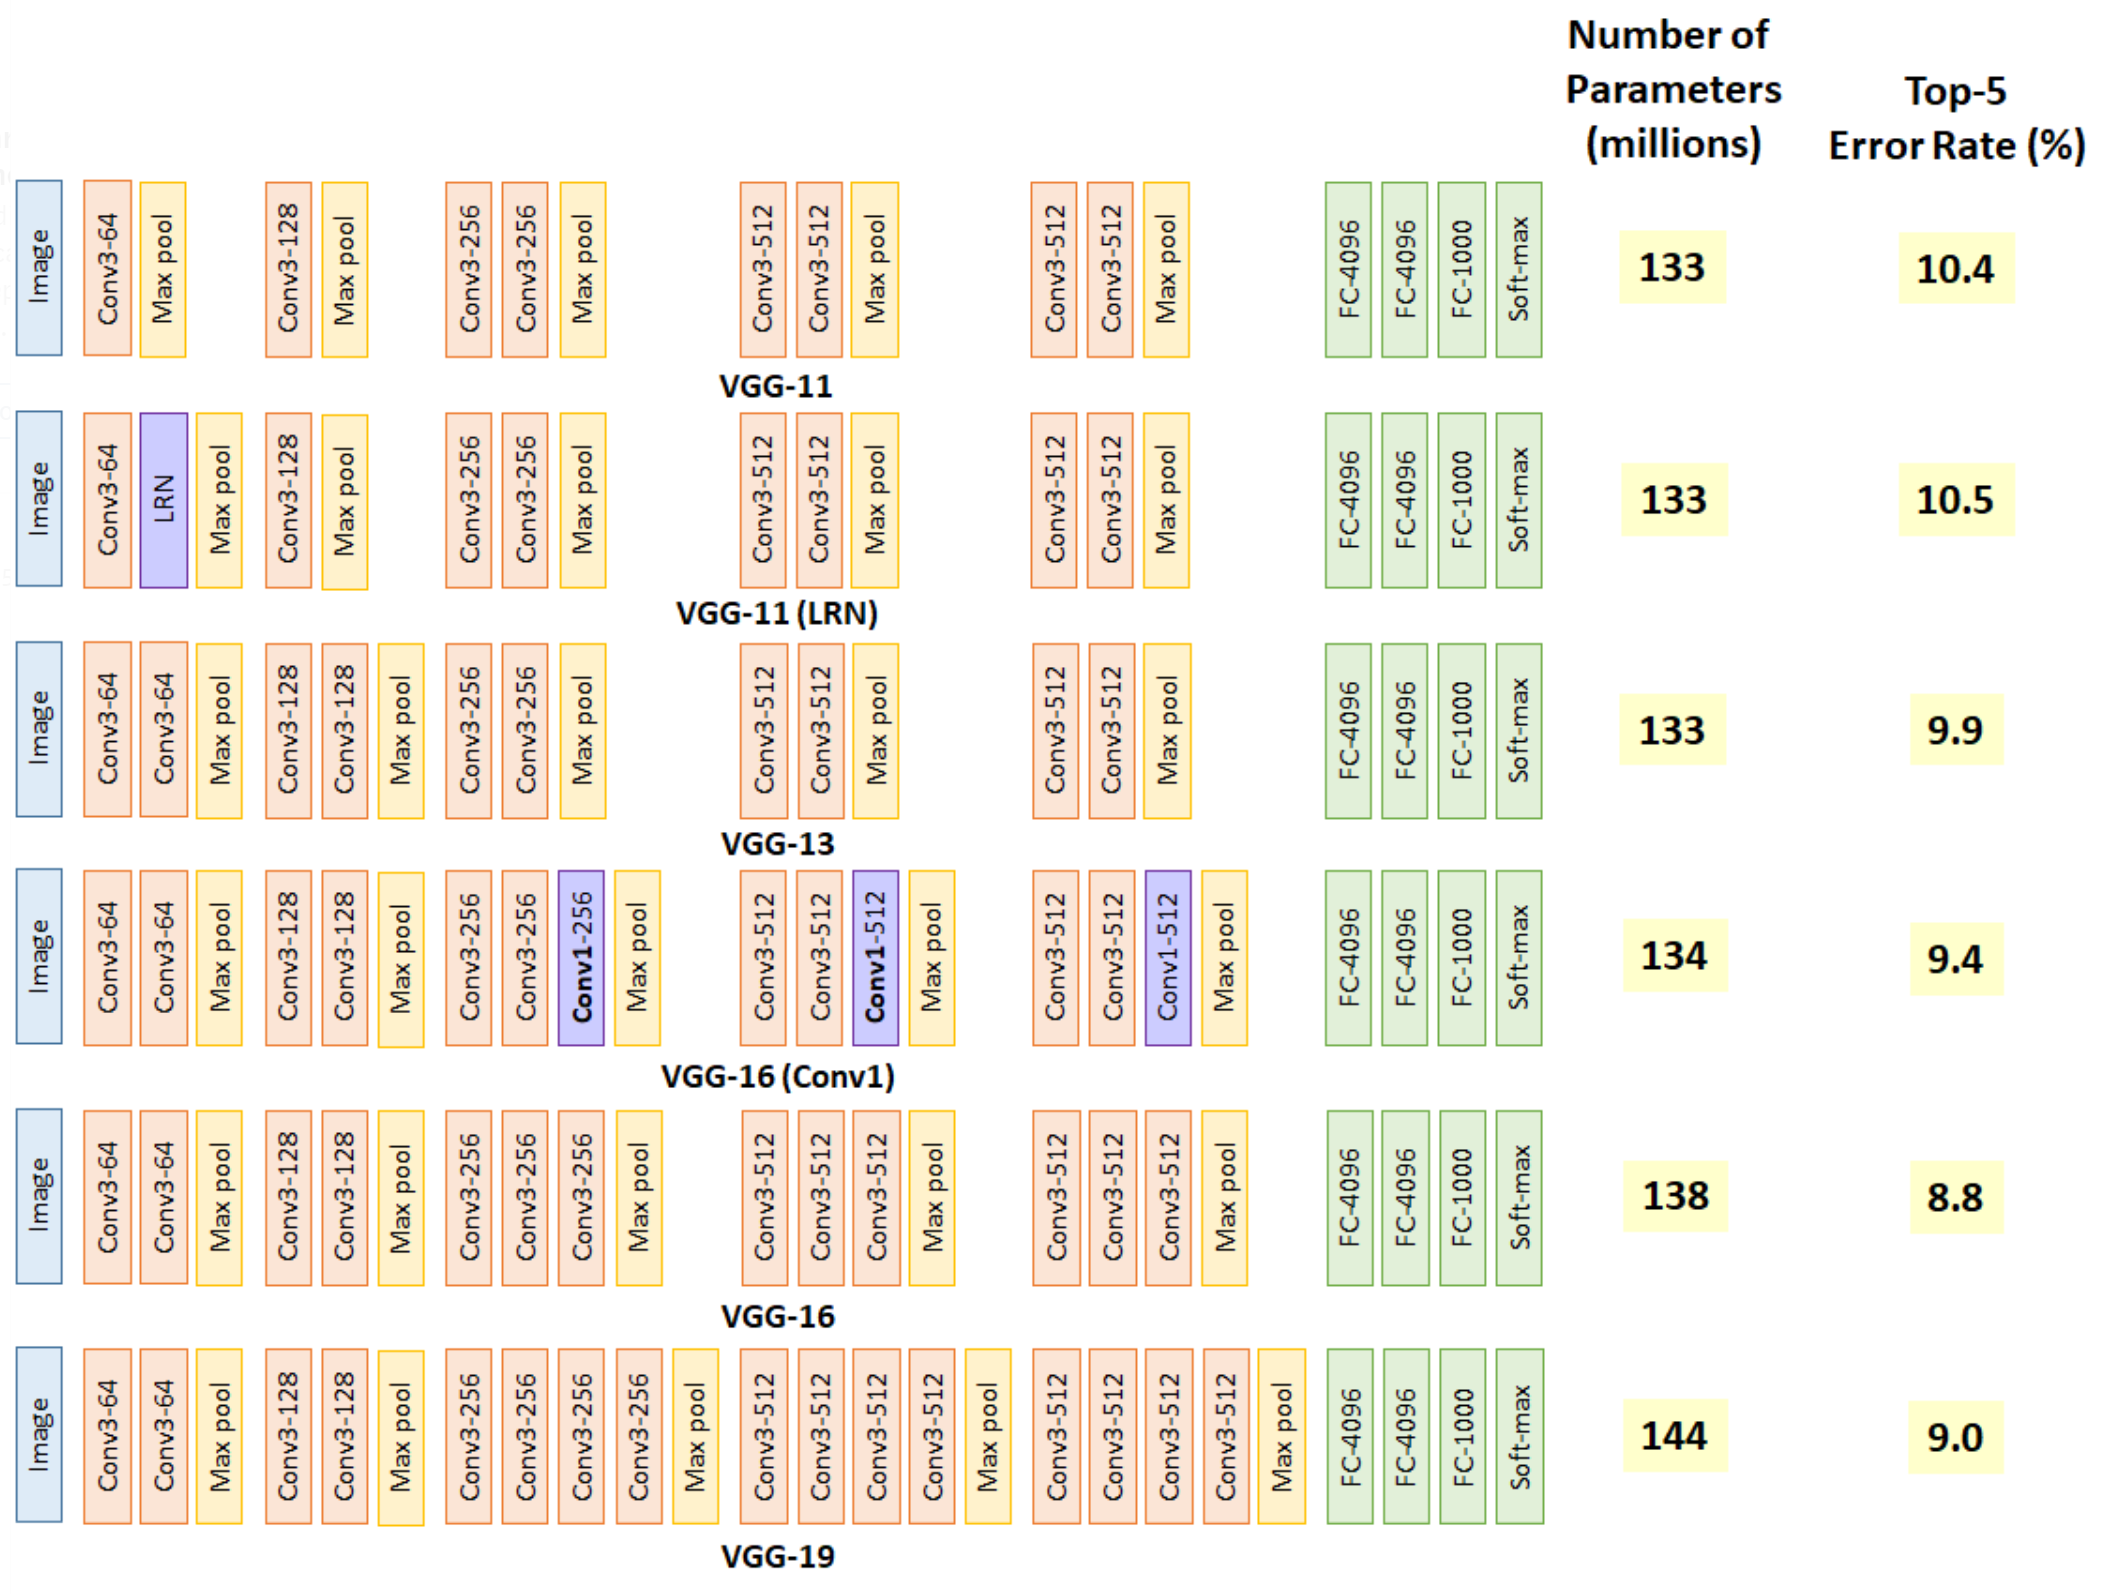

Image ref -> https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049


In [7]:
# VGG16 Architecture: 
display(Image(image_path + 'VGG_all.PNG', width=800, unconfined=True))
print('Image ref -> https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049')

VGG instroduced a model with 6 different CNN architecures that ranges from 11 layers to 25 layers deep. Each of the network consists of 5 blocks of consecutive convolutions paired with a max-pooling layer. The models then finishes it will 3 final dense layers without dropout for traininig. All the convolutional and max-pooling layers are set with a padding to have the "SAME" output size as teh input size. The convolutions will also have a stride of 1 (s = 1) and activated with the ReLU function. 

#### Below shows the VGG-16 model in more detail:

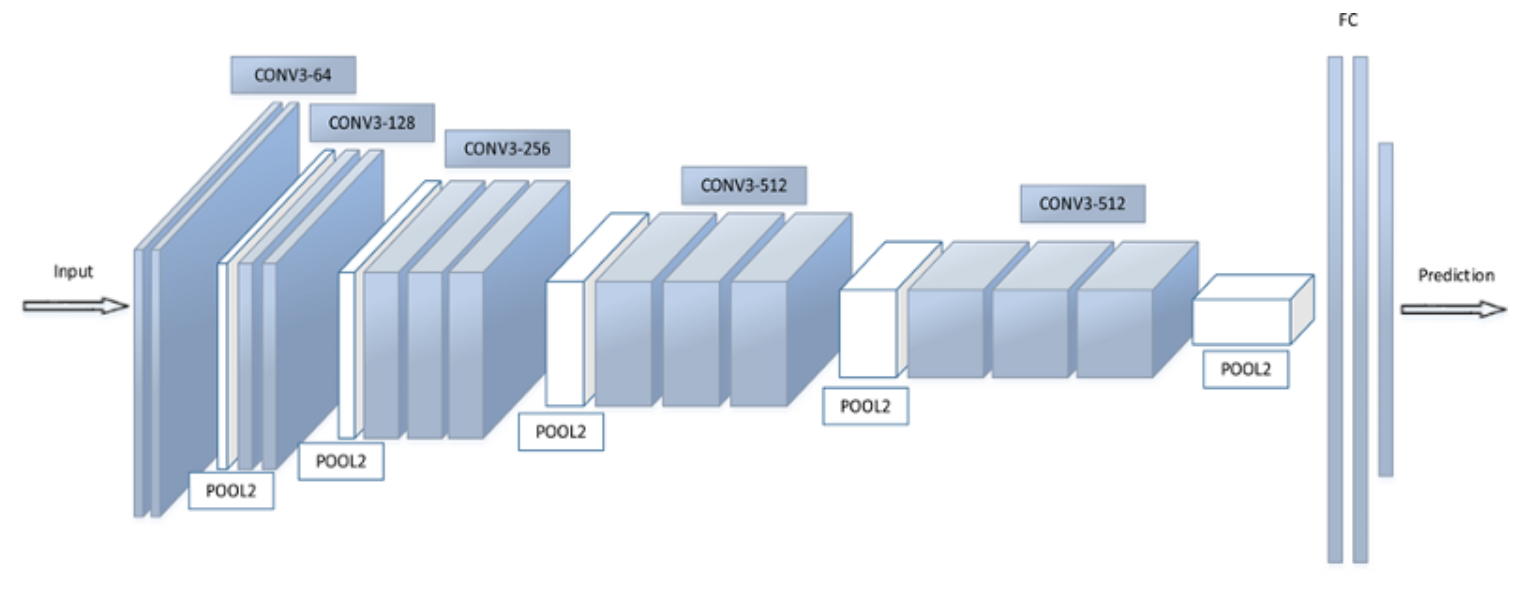

Image ref -> https://www.kaggle.com/shivamb/cnn-architectures-vgg-resnet-inception-tl


In [8]:
# VGG16 Architecture: 
display(Image(image_path + 'VGG16 Architecture.PNG', width=800, unconfined=True))
print('Image ref -> https://www.kaggle.com/shivamb/cnn-architectures-vgg-resnet-inception-tl')

#### Below shows the VGG-16 beside VGG-19 model in more detail:

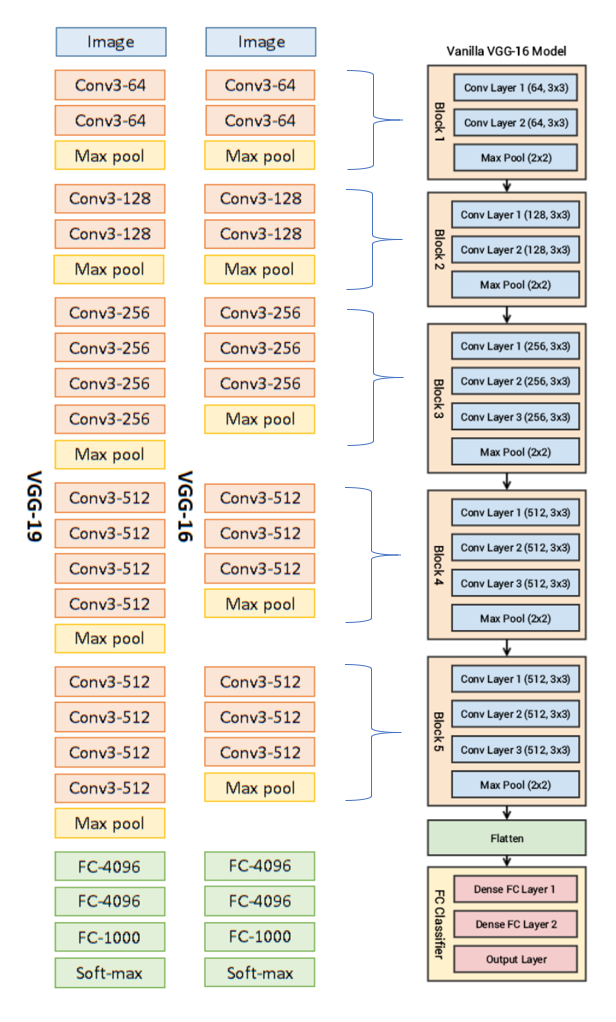

Image ref -> https://hub.packtpub.com/how-to-leverage-transfer-learning-using-pretrained-cnn-models-tutorial/
Image ref -> https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049


In [15]:
# VGG-16 and 19 Architectures: wiiht VGG-16 in more detail.
display(Image(image_path + 'VGG16 and 19 combine.PNG', width=600, unconfined=True))
print('Image ref -> https://hub.packtpub.com/how-to-leverage-transfer-learning-using-pretrained-cnn-models-tutorial/')
print('Image ref -> https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049')

Overall, the VGG-16 and VGG-19 models are considered to be the most performant architectures, where the number 16 and 19 means the depth (how deep the layers goes) of these architectures or the number of trainable layers that were stacked together. __VGG-16__ has a total of 138 million parameters to train for, and consists of 13 convolutional layers paired with 3 dense layers that totals to 16 layers. These arenot inclusive of the 5 max-pooling layers or the 2 dropout layers. Similar can be said for __VGG-19__, where it has 144 million parameters to train for and consists of three more convolutional layers.

## 1.2.1 - Contributions that were introduced by VGG creators:

List of contributions:
1) Substituting larger convolutions with multiple smaller ones. \
2) Increased depth of the feature maps. \
3) Data augmentation and jittering. \
4) Replacement of the fully connnected layers with convolutional ones.
